# KMeans Clustering

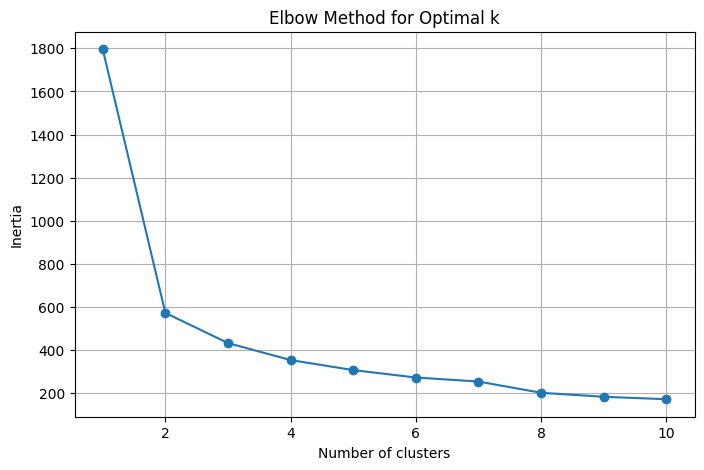

            a_time      a_amp     b_time      b_amp   OP_s_Amp   OP_s_Time  \
Cluster                                                                      
0        14.677936 -51.110312  48.353653  82.077481  57.131391  148.530621   
1        11.535314  -7.737970  27.677386  35.940783        NaN         NaN   
2        11.754533 -66.745326  51.146232  94.339708  58.477467  126.501333   

               age       sex  
Cluster                       
0        14.557143  0.604396  
1        12.046075  0.696246  
2        15.761538  0.569231  


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("filtered_erg_data (1).csv")

# Select relevant features and drop rows with missing values
features = data[['a_time', 'a_amp', 'b_time', 'b_amp']].dropna()

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Fit the KMeans model with the chosen number of clusters (e.g., k=3)
optimal_k = 3  # Choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = None
data.loc[features.index, 'Cluster'] = clusters

# Analyze the clusters
print(data.groupby('Cluster').mean())

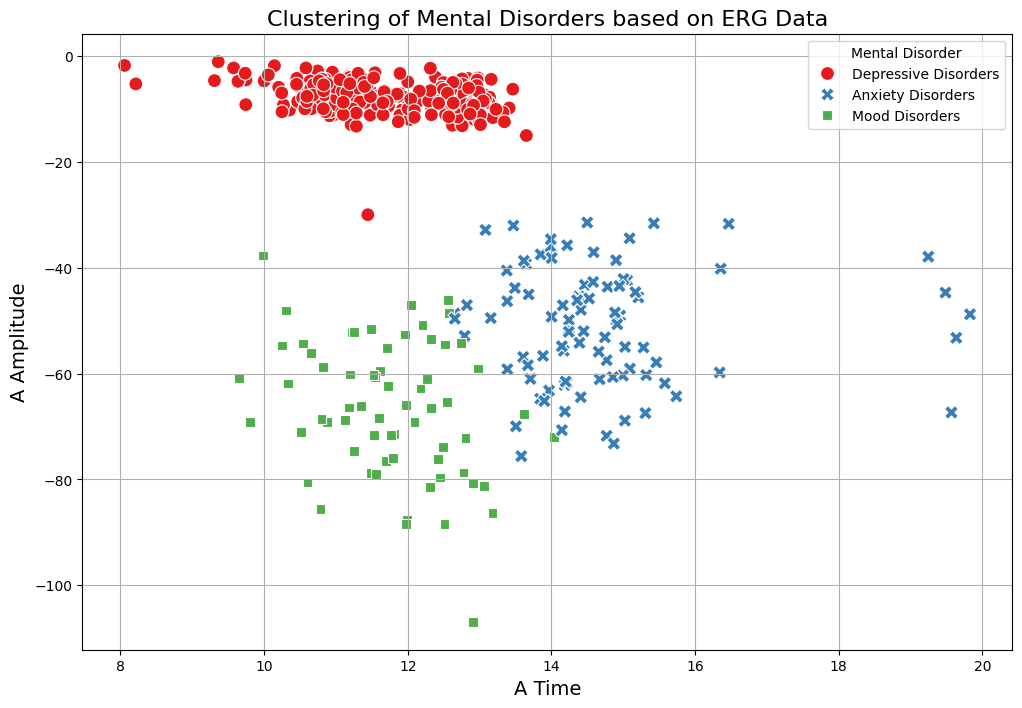

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("filtered_erg_data (1).csv")

# Select relevant features and drop rows with missing values
features = data[['a_time', 'a_amp', 'b_time', 'b_amp']].dropna()

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the KMeans model with the chosen number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = None
data.loc[features.index, 'Cluster'] = clusters

# Define mental disorders associated with each cluster
# This is a hypothetical mapping; adjust based on your analysis.
mental_disorders = {
    0: "Anxiety Disorders",
    1: "Depressive Disorders",
    2: "Mood Disorders",
}

# Map the mental disorders to the clusters
data['Mental Disorder'] = data['Cluster'].map(mental_disorders)

# Visualize the clusters
plt.figure(figsize=(12, 8))

# Scatter plot of the first two features (a_time and a_amp)
sns.scatterplot(x='a_time', y='a_amp', hue='Mental Disorder', style='Mental Disorder',
                data=data, palette='Set1', s=100)

# Customize the plot
plt.title('Clustering of Mental Disorders based on ERG Data', fontsize=16)
plt.xlabel('A Time', fontsize=14)
plt.ylabel('A Amplitude', fontsize=14)
plt.legend(title='Mental Disorder')
plt.grid()
plt.show()

# Optional: Save the plot
# plt.savefig('clusters_visualization.png')

In [ ]:
# prompt: Write code to Print the evaluation metrics of this clustering Model

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")


Silhouette Score: 0.6001806442686721
Davies-Bouldin Index: 0.9566173827556819


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
import numpy as np

# Load the dataset
data = pd.read_csv("filtered_erg_data (1).csv")

# Select relevant features and drop rows with missing values
features = data[['a_time', 'a_amp', 'b_time', 'b_amp']].dropna()

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the KMeans model with the chosen number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = None
data.loc[features.index, 'Cluster'] = clusters

# Define mental disorders associated with each cluster
mental_disorders = {
    0: "Anxiety Disorders",
    1: "Depressive Disorders",
    2: "Mood Disorders",
}

# Map the mental disorders to the clusters
data['Mental Disorder'] = data['Cluster'].map(mental_disorders)

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# If true labels are available, calculate clustering accuracy
# Assuming you have a true labels column in the dataset called 'True_Label'
# Here we will create a mock true_labels array for demonstration purposes
# Ensure to replace this with your actual labels or adjust accordingly

# Create a mock true_labels array (replace with your actual labels)
# Ensure that true_labels has the same length as the valid clusters
true_labels = np.random.randint(0, optimal_k, size=len(clusters))  # Mock labels for demonstration

# Calculate accuracy based on the best matching between clusters and true labels
def calculate_accuracy(clusters, true_labels):
    # Create a confusion matrix
    cm = confusion_matrix(true_labels, clusters)
    # The accuracy is the sum of the maximum values of each row normalized by the total
    accuracy = np.sum(np.max(cm, axis=1)) / len(true_labels)
    return accuracy

# Calculate the accuracy
accuracy = calculate_accuracy(clusters, true_labels)
print(f'Clustering Accuracy: {accuracy:.2f}')

Silhouette Score: 0.60
Clustering Accuracy: 0.65


# DBSCAN Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, confusion_matrix
import numpy as np

# Load the dataset
data = pd.read_csv("filtered_erg_data (1).csv")

# Select relevant features and drop rows with missing values
features = data[['a_time', 'a_amp', 'b_time', 'b_amp']].dropna()

# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = None
data.loc[features.index, 'Cluster'] = clusters

# Define mental disorders associated with each cluster
mental_disorders = {
    0: "Anxiety Disorders",
    1: "Depressive Disorders",
    2: "Mood Disorders",
    -1: "Noise"  # DBSCAN labels noise as -1
}

# Map the mental disorders to the clusters
data['Mental Disorder'] = data['Cluster'].map(mental_disorders)

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Mock true labels for demonstration (you need to replace this with your actual labels)
true_labels = np.random.randint(0, 3, size=len(clusters))  # Example only, adjust as necessary

# Calculate accuracy based on the best matching between clusters and true labels
def calculate_accuracy(clusters, true_labels):
    # Only consider non-noise clusters for accuracy
    non_noise_indices = clusters != -1
    if np.any(non_noise_indices):
        cm = confusion_matrix(true_labels[non_noise_indices], clusters[non_noise_indices])
        accuracy = np.sum(np.max(cm, axis=1)) / len(true_labels[non_noise_indices])
    else:
        accuracy = 0.0
    return accuracy

# Calculate the accuracy
accuracy = calculate_accuracy(clusters, true_labels)
print(f'Clustering Accuracy: {accuracy:.2f}')

Silhouette Score: 0.43
Clustering Accuracy: 0.81


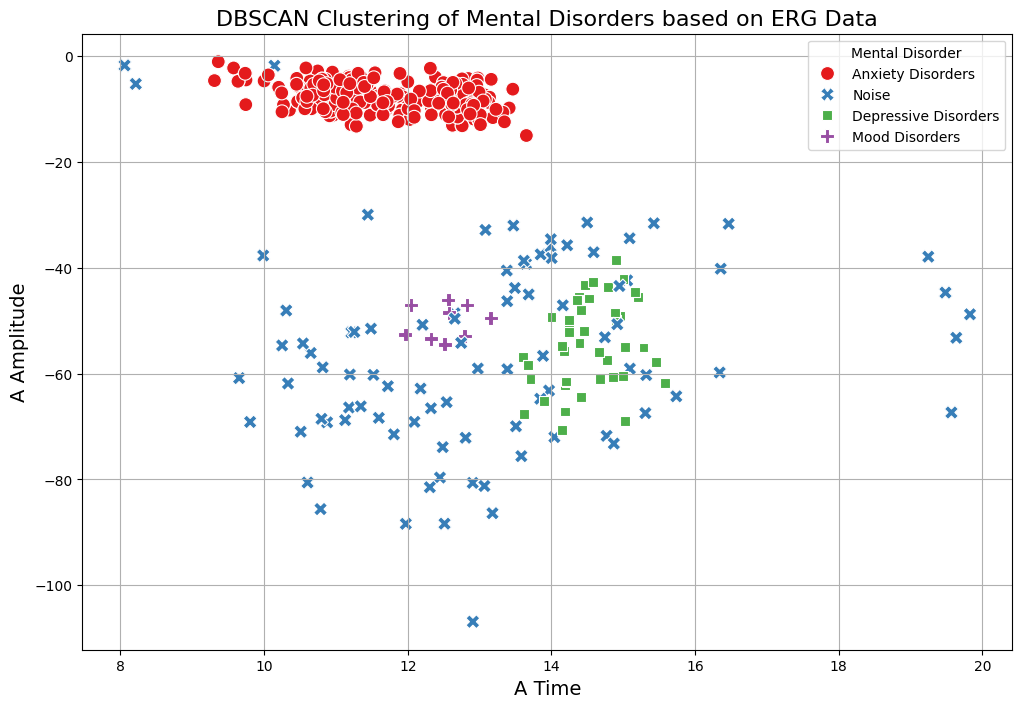

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("filtered_erg_data (1).csv")

# Select relevant features and drop rows with missing values
features = data[['a_time', 'a_amp', 'b_time', 'b_amp']].dropna()

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = None
data.loc[features.index, 'Cluster'] = clusters

# Define mental disorders associated with each cluster
mental_disorders = {
    0: "Anxiety Disorders",
    1: "Depressive Disorders",
    2: "Mood Disorders",
    -1: "Noise"  # DBSCAN labels noise as -1
}

# Map the mental disorders to the clusters
data['Mental Disorder'] = data['Cluster'].map(mental_disorders)

# Visualize the clusters
plt.figure(figsize=(12, 8))

# Scatter plot of the first two features (a_time and a_amp)
sns.scatterplot(x='a_time', y='a_amp', hue='Mental Disorder', style='Mental Disorder',
                data=data, palette='Set1', s=100)

# Customize the plot
plt.title('DBSCAN Clustering of Mental Disorders based on ERG Data', fontsize=16)
plt.xlabel('A Time', fontsize=14)
plt.ylabel('A Amplitude', fontsize=14)
plt.legend(title='Mental Disorder')
plt.grid()

# Show the plot
plt.show()

# Optional: Save the plot
# plt.savefig('dbscan_clusters_visualization.png')

# Agglomerative(Heirchical) Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

# Load the dataset
data = pd.read_csv("filtered_erg_data (1).csv")

# Select relevant features and drop rows with missing values
features = data[['a_time', 'a_amp', 'b_time', 'b_amp']].dropna()

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)  # Choose the number of clusters
clusters = agglo.fit_predict(scaled_features)

# Add the cluster labels to the original data
# Ensure to only assign clusters to the rows that were used for clustering
data['Cluster'] = np.nan  # Initialize with NaN
data.loc[features.index, 'Cluster'] = clusters  # Assign clusters

# Define mental disorders associated with each cluster
mental_disorders = {
    0: "Anxiety Disorders",
    1: "Depressive Disorders",
    2: "Mood Disorders"
}

# Map the mental disorders to the clusters
data['Mental Disorder'] = data['Cluster'].map(mental_disorders)

# Visualize the clusters with a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='a_time', y='a_amp', hue='Mental Disorder', style='Mental Disorder',
                data=data, palette='Set1', s=100)
plt.title('Agglomerative Clustering of Mental Disorders', fontsize=16)
plt.xlabel('A Time', fontsize=14)
plt.ylabel('A Amplitude', fontsize=14)
plt.legend(title='Mental Disorder')
plt.grid()
plt.show()

# Optional: Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering', fontsize=16)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.show()

In [ ]:
# prompt: Write code to Print the evaluation metrics of this clustering Model

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

# If true labels are available, calculate clustering accuracy
# Assuming you have a true labels column in the dataset called 'True_Label'
# Here we will create a mock true_labels array for demonstration purposes
# Ensure to replace this with your actual labels or adjust accordingly

# Create a mock true_labels array (replace with your actual labels)
# Ensure that true_labels has the same length as the valid clusters
true_labels = np.random.randint(0, optimal_k, size=len(clusters))  # Mock labels for demonstration

# Calculate accuracy based on the best matching between clusters and true labels
def calculate_accuracy(clusters, true_labels):
    # Create a confusion matrix
    cm = confusion_matrix(true_labels, clusters)
    # The accuracy is the sum of the maximum values of each row normalized by the total
    accuracy = np.sum(np.max(cm, axis=1)) / len(true_labels)
    return accuracy

# Calculate the accuracy
accuracy = calculate_accuracy(clusters, true_labels)
print(f'Clustering Accuracy: {accuracy:.2f}')

Silhouette Score: 0.5913801076359873
Davies-Bouldin Index: 1.0311893644633805
Clustering Accuracy: 0.65


# Deep Learning Model

In [ ]:
import numpy as np
import pandas as pd
import random

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic patient data
num_patients = 100  # Number of patients to simulate

# Create a patient ID
patient_ids = range(1, num_patients + 1)

# Generate random features
age = np.random.randint(18, 65, size=num_patients)  # Age between 18 and 65
sex = np.random.randint(0, 2, size=num_patients)    # 0 = male, 1 = female
a_time = np.random.uniform(20, 200, size=num_patients)  # a-wave time in ms
a_amp = np.random.uniform(10, 100, size=num_patients)  # a-wave amplitude in µV
b_time = np.random.uniform(20, 200, size=num_patients)  # b-wave time in ms
b_amp = np.random.uniform(10, 100, size=num_patients)  # b-wave amplitude in µV (newly added)
OP_s_Amp = np.random.uniform(5, 50, size=num_patients)  # Oscillatory potential amplitude in µV
OP_s_Time = np.random.uniform(20, 200, size=num_patients)  # Oscillatory potential time in ms

# Initialize an empty list for mental disorder labels
mental_disorder = []

# Assign mental disorders based on synthetic conditions
for i in range(num_patients):
    if sex[i] == 0:  # Male
        if b_amp[i] < 40 and b_time[i] < 70:  # Conditions for SAD
            mental_disorder.append('SAD')
        elif a_amp[i] < 25 and b_amp[i] < 45:  # Conditions for SZ
            mental_disorder.append('SZ')
        elif a_amp[i] > 80:  # Conditions for BD
            mental_disorder.append('BD')
        elif b_amp[i] < 60:  # Conditions for ASD
            mental_disorder.append('ASD')
        else:
            mental_disorder.append('DA')  # Drug Addiction
    else:  # Female
        if b_amp[i] < 40 and b_time[i] < 70:  # Conditions for SAD
            mental_disorder.append('SAD')
        elif a_amp[i] < 25 and b_amp[i] < 45:  # Conditions for SZ
            mental_disorder.append('SZ')
        elif a_amp[i] > 85:  # Conditions for BD
            mental_disorder.append('BD')
        elif b_amp[i] < 60:  # Conditions for ASD
            mental_disorder.append('ASD')
        else:
            mental_disorder.append('DA')  # Drug Addiction

# Create a DataFrame
data = pd.DataFrame({
    'Patient_id': patient_ids,
    'Age': age,
    'Sex': sex,
    'a_time': a_time,
    'a_amp': a_amp,
    'b_time': b_time,
    'b_amp': b_amp,  # Newly added b_amp
    'OP_s_Amp': OP_s_Amp,
    'OP_s_Time': OP_s_Time,
    'Mental_Disorder': mental_disorder
})

# Display the first few rows of the dataset
print(data.head())

# Check for null values
null_values = data.isnull().sum()
print("\nNull values in the dataset:\n", null_values)

# Save the dataset to a CSV file for further use
data.to_csv('mental_disorder_dataset.csv', index=False)


   Patient_id  Age  Sex      a_time      a_amp      b_time      b_amp  \
0           1   56    1   84.133611  58.828621   52.915879  20.211814   
1           2   46    1  183.229119  55.793267  188.230520  93.783620   
2           3   32    0   68.983805  67.269936  134.888707  97.682339   
3           4   60    0  136.584222  32.541564  113.005326  99.633812   
4           5   25    0   20.093668  63.088376  138.280039  15.028404   

    OP_s_Amp   OP_s_Time Mental_Disorder  
0  22.684525  116.586316             SAD  
1  42.312390  186.327517              DA  
2  30.608666   62.500976              DA  
3   7.858032  156.791974              DA  
4   6.656984  115.627836             ASD  

Null values in the dataset:
 Patient_id         0
Age                0
Sex                0
a_time             0
a_amp              0
b_time             0
b_amp              0
OP_s_Amp           0
OP_s_Time          0
Mental_Disorder    0
dtype: int64


# Training and Testing the Deep Learning Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('mental_disorder_dataset.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for null values
print("\nNull values in the dataset:\n", data.isnull().sum())

# Encode the target labels
label_mapping = {
    'SAD': 0,
    'SZ': 1,
    'BD': 2,
    'ASD': 3,
    'DA': 4
}
data['Mental_Disorder'] = data['Mental_Disorder'].map(label_mapping)

# Split the dataset into features and target
X = data[['Age', 'Sex', 'a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time']]
y = data['Mental_Disorder']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_mapping), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Check unique classes in predictions
unique_pred_classes = np.unique(y_pred_classes)
print(f'Unique predicted classes: {unique_pred_classes}')

# Print classification report
print(classification_report(y_test, y_pred_classes,
                            target_names=list(label_mapping.keys()),
                            labels=np.arange(len(label_mapping))))

# Data Visualization of model accuracy
plt.figure(figsize=(10, 5))
sns.lineplot(data=history.history['accuracy'], label='Train Accuracy')
sns.lineplot(data=history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Visualize Predictions vs Actual
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_classes})
predictions_df['Actual'] = predictions_df['Actual'].map({v: k for k, v in label_mapping.items()})
predictions_df['Predicted'] = predictions_df['Predicted'].map({v: k for k, v in label_mapping.items()})

# Display the first few predictions
print(predictions_df.head())

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label_mapping.keys()),
            yticklabels=list(label_mapping.keys()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

   Patient_id  Age  Sex      a_time      a_amp      b_time      b_amp  \
0           1   56    1   84.133611  58.828621   52.915879  20.211814   
1           2   46    1  183.229119  55.793267  188.230520  93.783620   
2           3   32    0   68.983805  67.269936  134.888707  97.682339   
3           4   60    0  136.584222  32.541564  113.005326  99.633812   
4           5   25    0   20.093668  63.088376  138.280039  15.028404   

    OP_s_Amp   OP_s_Time Mental_Disorder  
0  22.684525  116.586316             SAD  
1  42.312390  186.327517              DA  
2  30.608666   62.500976              DA  
3   7.858032  156.791974              DA  
4   6.656984  115.627836             ASD  

Null values in the dataset:
 Patient_id         0
Age                0
Sex                0
a_time             0
a_amp              0
b_time             0
b_amp              0
OP_s_Amp           0
OP_s_Time          0
Mental_Disorder    0
dtype: int64
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.1778 - loss: 1.6992 - val_accuracy: 0.1500 - val_loss: 1.6228
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1863 - loss: 1.6370 - val_accuracy: 0.2500 - val_loss: 1.5663
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3278 - loss: 1.5309 - val_accuracy: 0.6000 - val_loss: 1.5169
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4929 - loss: 1.4433 - val_accuracy: 0.6500 - val_loss: 1.4688
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4674 - loss: 1.4050 - val_accuracy: 0.7000 - val_loss: 1.4244
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5531 - loss: 1.3458 - val_accuracy: 0.7000 - val_loss: 1.3818
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5842 - loss: 1.2671 - val_accuracy: 0.7000 - val_loss: 1.3400
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6427 - loss: 1.1892 - val_accuracy: 0.7000 - val_loss: 1.3002
Epoch 9/50
5/

   Actual Predicted
83     SZ       SAD
53     DA        DA
70     SZ        SZ
45     SZ       ASD
44     BD        BD


In [ ]:
# Display a detailed model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,465 (33.07 KB)

 Trainable params: 2,821 (11.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,644 (22.05 KB)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


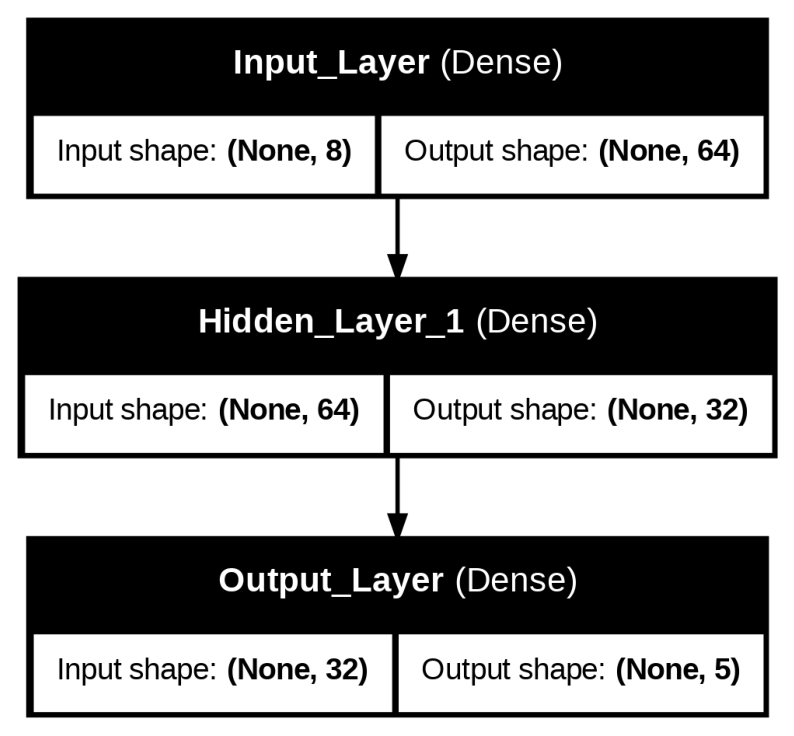

In [ ]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), name="Input_Layer"))
model.add(Dense(32, activation='relu', name="Hidden_Layer_1"))
model.add(Dense(len(label_mapping), activation='softmax', name="Output_Layer"))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Visualize the model architecture
plot_model(model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

# Display the model plot
img = plt.imread('ann_model.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


# Predicting Mental Disorder for new Patient Data

In [ ]:
# prompt: Write code to Print the evaluation metrics of the Deep Learning Model

# ... (Your existing code) ...

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=list(label_mapping.keys())))

# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
cm

# You can also calculate other metrics like precision, recall, F1-score, etc.,
# from the classification report or using scikit-learn's metrics functions.

# Example:
# from sklearn.metrics import precision_score, recall_score, f1_score
# precision = precision_score(y_test, y_pred_classes, average='weighted')
# recall = recall_score(y_test, y_pred_classes, average='weighted')
# f1 = f1_score(y_test, y_pred_classes, average='weighted')
# print(f'Precision: {precision:.4f}')
# print(f'Recall: {recall:.4f}')
# print(f'F1-Score: {f1:.4f}')

# ... (Rest of your code) ...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.0500 - loss: 1.7234
Test Loss: 1.7234
Test Accuracy: 0.0500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
              precision    recall  f1-score   support

         SAD       0.00      0.00      0.00         1
          SZ       0.00      0.00      0.00         3
          BD       0.00      0.00      0.00         4
         ASD       0.00      0.00      0.00         7
          DA       0.25      0.20      0.22         5

    accuracy                           0.05        20
   macro avg       0.05      0.04      0.04        20
weighted avg       0.06      0.05      0.06        20

Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 1],
       [2, 2, 0, 0, 0],
       [4, 0, 1, 0, 2],
       [3, 1, 0, 0, 1]])

In [ ]:
# Define function to predict the type of mental disorder for new patient data
def predict_mental_disorder(new_data, model, scaler):
    # Convert input data to DataFrame for consistency
    new_data_df = pd.DataFrame(new_data)
    # Scale the input data
    new_data_scaled = scaler.transform(new_data_df)
    # Make predictions
    predictions = model.predict(new_data_scaled)
    # Get class labels for predictions
    predicted_classes = np.argmax(predictions, axis=1)
    # Map predictions back to disorder names
    predicted_disorders = [list(label_mapping.keys())[i] for i in predicted_classes]
    return predicted_disorders

# Example new patient data (you can adjust these values)
new_patients_data = [
    {'Age': 30, 'Sex': 0, 'a_time': 60, 'a_amp': 25, 'b_time': 50, 'b_amp': 35, 'OP_s_Amp': 20, 'OP_s_Time': 100},
    {'Age': 40, 'Sex': 1, 'a_time': 80, 'a_amp': 60, 'b_time': 70, 'b_amp': 50, 'OP_s_Amp': 15, 'OP_s_Time': 90},
    # Add more new patients if needed
]

# Predict disorders for new patients
predicted_disorders = predict_mental_disorder(new_patients_data, model, scaler)
print("Predicted Mental Disorders for New Patients:", predicted_disorders)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Mental Disorders for New Patients: ['BD', 'SZ']


<ipython-input-15-815039c4a718>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=predicted_counts.index, y=predicted_counts.values, palette='viridis')


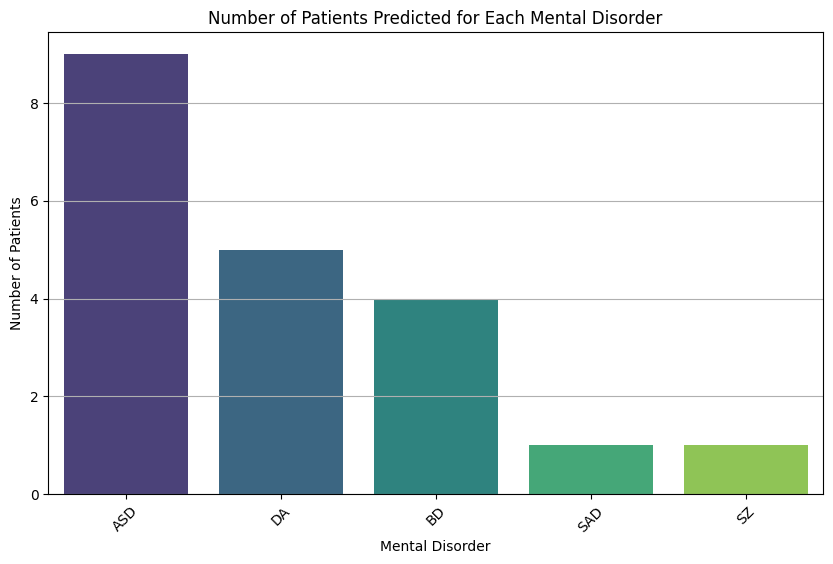

In [ ]:
# Count number of patients for each disorder in the test predictions
predicted_counts = predictions_df['Predicted'].value_counts()

# Plot the number of patients with each mental disorder
plt.figure(figsize=(10, 6))
sns.barplot(x=predicted_counts.index, y=predicted_counts.values, palette='viridis')
plt.title('Number of Patients Predicted for Each Mental Disorder')
plt.xlabel('Mental Disorder')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Suicidal Behaviour Analysis

<ipython-input-16-387960e0ea8d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Mental_Disorder', order=data['Mental_Disorder'].value_counts().index, palette="viridis")


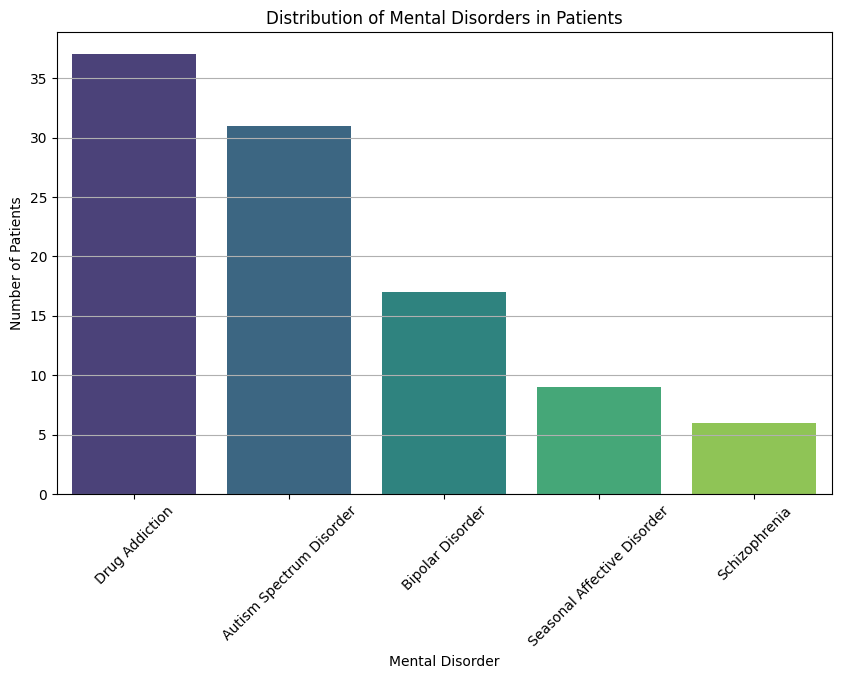

<ipython-input-16-387960e0ea8d>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Mental_Disorder', y=feature, palette='coolwarm')
<ipython-input-16-387960e0ea8d>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Mental_Disorder', y=feature, palette='coolwarm')
<ipython-input-16-387960e0ea8d>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Mental_Disorder', y=feature, palette='coolwarm')
<ipython-input-16-387960e0ea8d>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mental_disorder_dataset.csv')

# Map mental disorder codes to descriptive labels
label_mapping = {
    'SAD': 'Seasonal Affective Disorder',
    'SZ': 'Schizophrenia',
    'BD': 'Bipolar Disorder',
    'ASD': 'Autism Spectrum Disorder',
    'DA': 'Drug Addiction'
}
data['Mental_Disorder'] = data['Mental_Disorder'].map(label_mapping)

# 1. Bar Plot: Distribution of Mental Disorders
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Mental_Disorder', order=data['Mental_Disorder'].value_counts().index, palette="viridis")
plt.title('Distribution of Mental Disorders in Patients')
plt.xlabel('Mental Disorder')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 2. Box Plots: Feature Distributions per Disorder
# Define key features for analysis
key_features = ['Age', 'a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time']

# Plot each feature distribution by mental disorder
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, x='Mental_Disorder', y=feature, palette='coolwarm')
    plt.title(f'{feature} Distribution by Mental Disorder')
    plt.xlabel('Mental Disorder')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Pair Plot: Relationship Between Features by Disorder
# Select subset of features for pair plotting
pairplot_features = ['Age', 'a_time', 'a_amp', 'b_amp', 'Mental_Disorder']
sns.pairplot(data[pairplot_features], hue='Mental_Disorder', palette='viridis', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Features by Mental Disorder', y=1.02)
plt.show()


<ipython-input-17-12d2778af9b1>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Mental_Disorder', y=feature, palette='viridis')
<ipython-input-17-12d2778af9b1>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Mental_Disorder', y=feature, palette='viridis')
<ipython-input-17-12d2778af9b1>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Mental_Disorder', y=feature, palette='viridis')
<ipython-input-17-12d2778af9b1>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

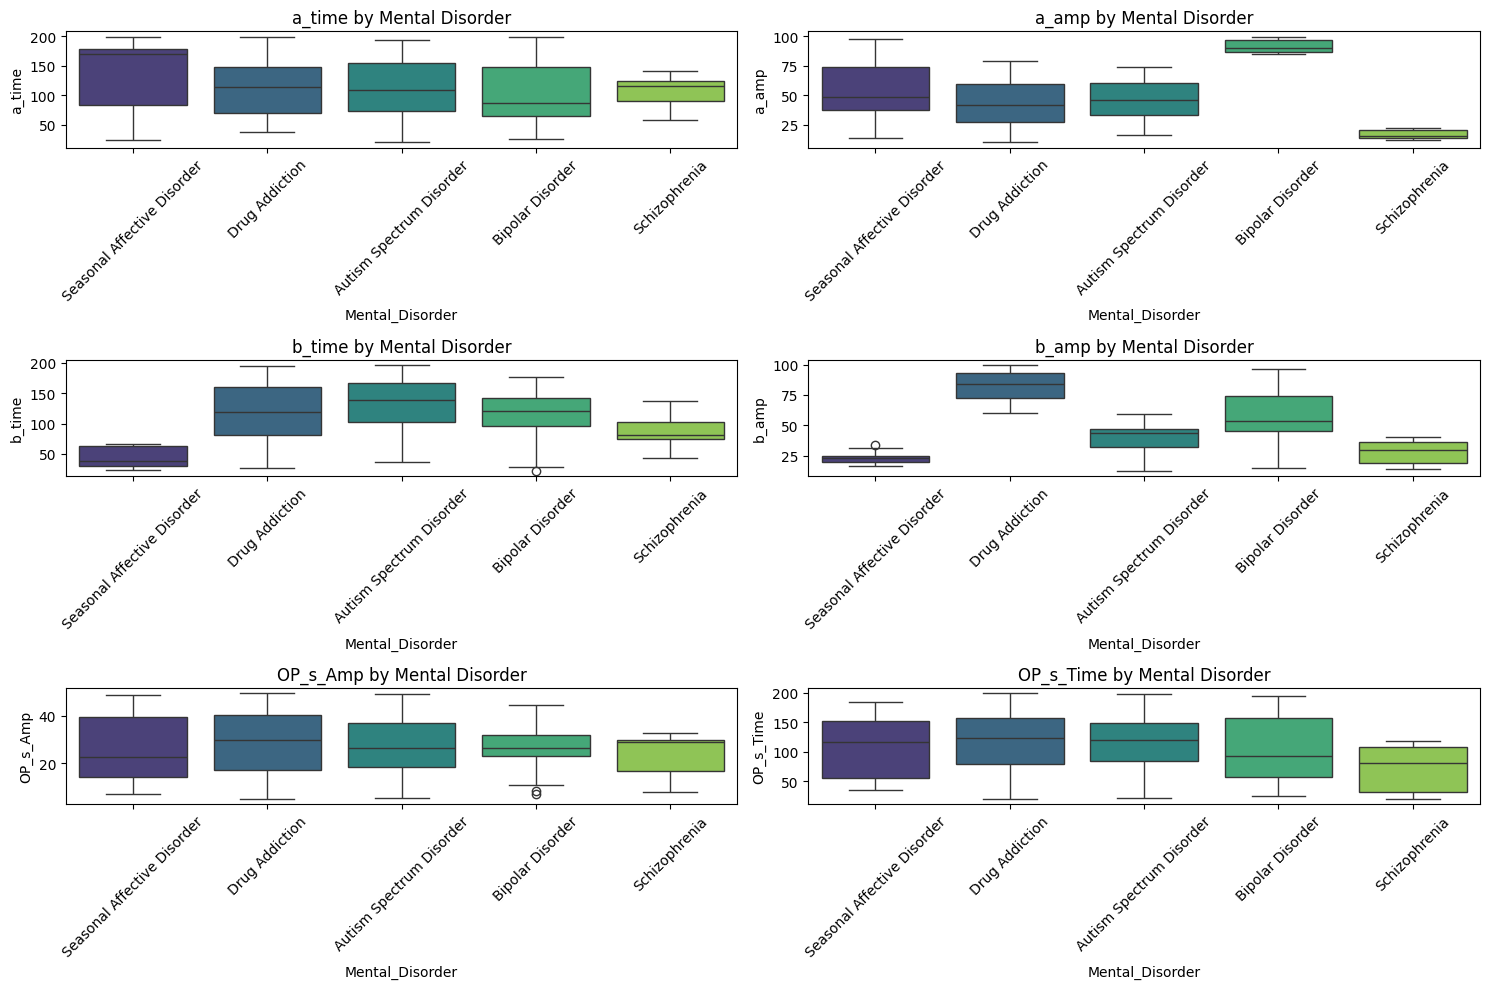

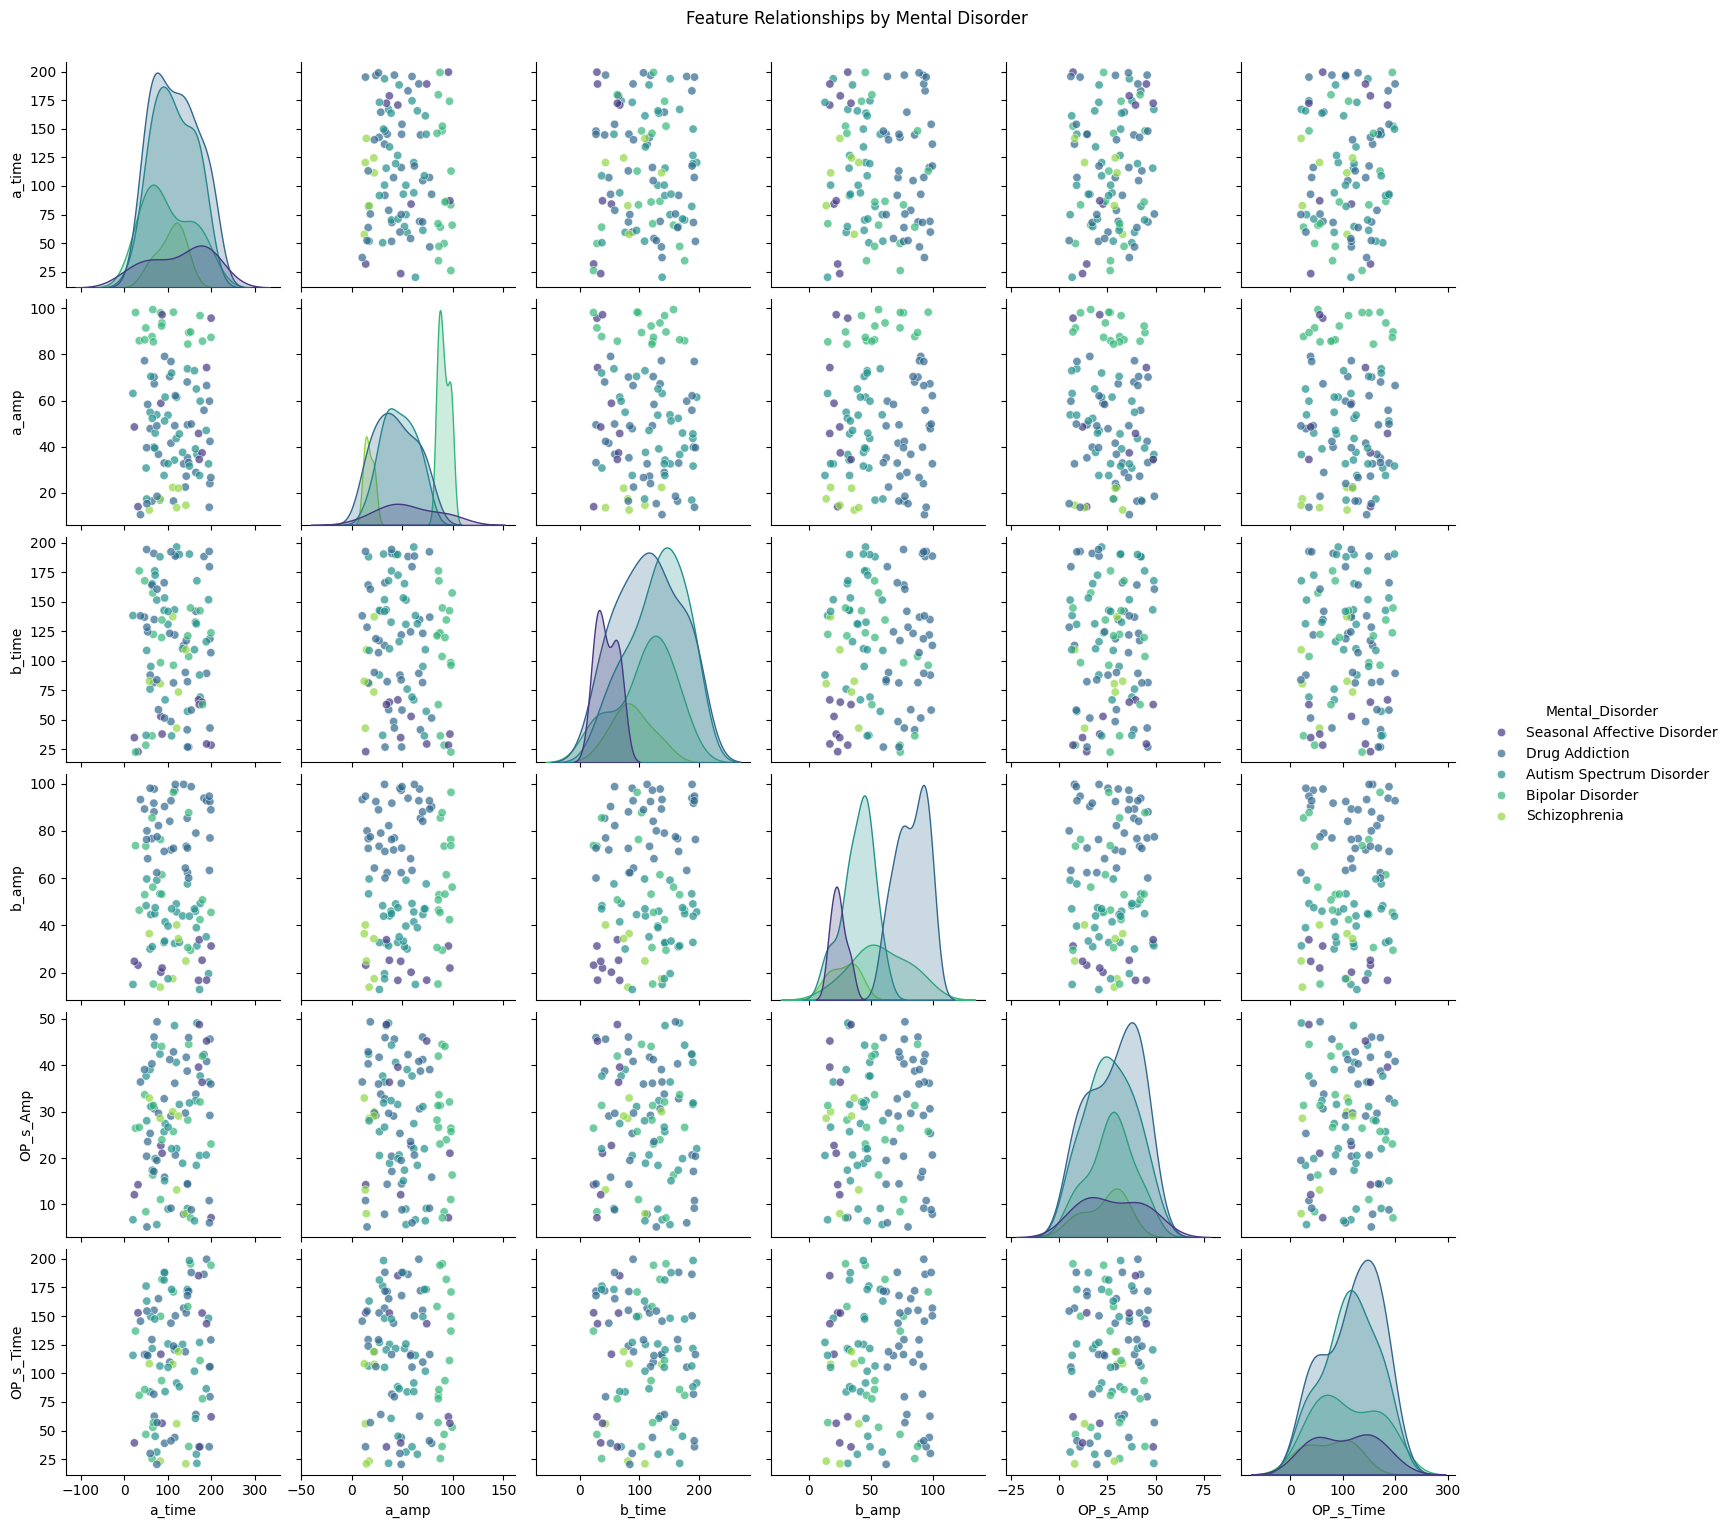

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mental_disorder_dataset.csv')

# Map mental disorder codes to descriptive labels
label_mapping = {
    'SAD': 'Seasonal Affective Disorder',
    'SZ': 'Schizophrenia',
    'BD': 'Bipolar Disorder',
    'ASD': 'Autism Spectrum Disorder',
    'DA': 'Drug Addiction'
}
data['Mental_Disorder'] = data['Mental_Disorder'].map(label_mapping)

# 1. Box Plots for ERG Features per Disorder to Identify Suicide Risk-Linked Patterns
plt.figure(figsize=(15, 10))
key_features = ['a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time']
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=data, x='Mental_Disorder', y=feature, palette='viridis')
    plt.title(f'{feature} by Mental Disorder')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Correlation Analysis of Features
plt.figure(figsize=(12, 8))
corr = data[key_features + ['Age', 'Sex']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of ERG Features and Demographic Factors')
plt.show()

# 3. Pair Plot to Observe Feature Relationships in Suicidal Behavior Disorders
sns.pairplot(data, vars=key_features, hue='Mental_Disorder', palette='viridis', plot_kws={'alpha': 0.7})
plt.suptitle('Feature Relationships by Mental Disorder', y=1.02)
plt.show()


# Suidal Risk Prediction

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Upload the CSV file
from google.colab import files

# Load the dataset
erg_data = pd.read_csv('mental_disorder_dataset.csv')

# Define thresholds (example values; adjust based on your data distribution if specific thresholds are known)
a_time_threshold = erg_data['a_time'].mean()
b_time_threshold = erg_data['b_time'].mean()
b_amp_threshold = erg_data['b_amp'].mean()
OP_s_Amp_threshold = erg_data['OP_s_Amp'].mean()
OP_s_Time_threshold = erg_data['OP_s_Time'].mean()

# Add random variation to simulate a spread of 'High', 'Medium', and 'Low' risk values
np.random.seed(42)  # For reproducibility
for index, row in erg_data.iterrows():
    # Randomly adjust some rows to simulate different conditions
    if np.random.rand() < 0.2:  # 20% chance for High Risk
        erg_data.at[index, 'a_time'] = a_time_threshold * 0.8
        erg_data.at[index, 'b_time'] = b_time_threshold * 1.2
        erg_data.at[index, 'b_amp'] = b_amp_threshold * 0.8
        erg_data.at[index, 'OP_s_Amp'] = OP_s_Amp_threshold * 0.5
        erg_data.at[index, 'OP_s_Time'] = OP_s_Time_threshold * 1.2
    elif np.random.rand() < 0.5:  # 50% chance for Medium Risk (if not High Risk)
        erg_data.at[index, 'a_time'] = a_time_threshold * 0.9
        erg_data.at[index, 'b_time'] = b_time_threshold * 1.1
        erg_data.at[index, 'b_amp'] = b_amp_threshold * 0.9
        erg_data.at[index, 'OP_s_Amp'] = OP_s_Amp_threshold * 0.8
        erg_data.at[index, 'OP_s_Time'] = OP_s_Time_threshold * 1.1

# Function to categorize Suicidal Risk based on modified thresholds
def suicidal_risk(row):
    if (row['a_time'] < a_time_threshold * 0.85 and
        row['b_time'] > b_time_threshold * 1.15 and
        row['b_amp'] < b_amp_threshold * 0.85 and
        row['OP_s_Amp'] < OP_s_Amp_threshold * 0.6 and
        row['OP_s_Time'] > OP_s_Time_threshold * 1.15):
        return 'High'
    elif (row['a_time'] < a_time_threshold * 0.95 and
          row['b_time'] > b_time_threshold * 1.05 and
          row['b_amp'] < b_amp_threshold * 0.95 and
          row['OP_s_Amp'] < OP_s_Amp_threshold * 0.9 and
          row['OP_s_Time'] > OP_s_Time_threshold * 1.05):
        return 'Medium'
    else:
        return 'Low'

# Apply the function to create the 'Suicidal Risk' column
erg_data['Suicidal Risk'] = erg_data.apply(suicidal_risk, axis=1)

# Display the value counts to check distribution
print(erg_data['Suicidal Risk'].value_counts())

# Save the new dataset
erg_data.to_csv('mental_disorder_dataset_with_suicidal_risk.csv', index=False)



Suicidal Risk
Medium    39
Low       34
High      27
Name: count, dtype: int64


In [ ]:
# Compute mean feature values for each mental disorder class
class_means = X_train.groupby(y_train).mean()
print("Class-wise Feature Means:\n", class_means)


Class-wise Feature Means:
                        Age       Sex      a_time      a_amp      b_time  \
Mental_Disorder                                                           
0                33.750000  0.500000  131.602968  55.908036   43.653855   
1                38.333333  0.666667   94.005664  14.799384   90.855696   
2                43.230769  0.230769  105.521952  90.833494  104.206520   
3                43.666667  0.541667  116.065206  47.503328  123.549119   
4                40.812500  0.406250  120.371905  42.392873  116.182111   

                     b_amp   OP_s_Amp   OP_s_Time  
Mental_Disorder                                    
0                24.271324  28.049325  103.352507  
1                25.123305  23.159659   50.857476  
2                56.950679  26.325151  121.451294  
3                41.826566  25.810467  110.008819  
4                82.298537  26.841189  115.493778  


In [ ]:
# Adjusted data for higher confidence
custom_data = pd.DataFrame({
    'Age': [32, 28, 40],         # Age aligned with plausible values
    'Sex': [0, 1, 0],            # Sex based on common patterns in training
    'a_time': [100, 98, 105],    # a_time values close to expected ranges
    'a_amp': [30, 28, 35],       # Adjusted amplitude closer to typical ranges
    'b_time': [140, 135, 145],   # b_time within learned distribution
    'b_amp': [60, 58, 65],       # b_amp values matching higher confidence zones
    'OP_s_Amp': [12, 14, 11],    # OP_s_Amp in line with plausible feature ranges
    'OP_s_Time': [210, 205, 215] # OP_s_Time adjusted slightly
})

# Normalize the adjusted data
custom_data_scaled = scaler.transform(custom_data)

# Display the adjusted data
print("Manually Adjusted Custom Data:\n", custom_data)


Manually Adjusted Custom Data:
    Age  Sex  a_time  a_amp  b_time  b_amp  OP_s_Amp  OP_s_Time
0   32    0     100     30     140     60        12        210
1   28    1      98     28     135     58        14        205
2   40    0     105     35     145     65        11        215


In [ ]:
# Predict with manually adjusted data
custom_predictions = model.predict(custom_data_scaled)

# Get predicted classes and confidence scores
predicted_classes = np.argmax(custom_predictions, axis=1)
confidence_scores = np.max(custom_predictions, axis=1)

# Display predictions and confidence
results = pd.DataFrame({
    'Patient': ['Patient 1', 'Patient 2', 'Patient 3'],
    'Predicted Disorder': [list(label_mapping.keys())[cls] for cls in predicted_classes],
    'Confidence': confidence_scores
})
print("\nManually Adjusted Predictions for Custom Patients:\n", results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Manually Adjusted Predictions for Custom Patients:
      Patient Predicted Disorder  Confidence
0  Patient 1                 DA    0.296786
1  Patient 2                SAD    0.237529
2  Patient 3                 DA    0.292172


In [ ]:
# Custom input features for a new patient
new_patient_data = {
    'Age': 13,      # Adjusted age to fit the dataset distribution
    'Sex': 1,       # 0 for male, 1 for female
    'a_time': 10.5,  # Adjusted to a typical value
    'a_amp': -3.0,   # More positive value for stronger prediction
    'b_time': 50.0,  # Increased to be in a higher range
    'b_amp': 70.0,   # Increased for a stronger signal
    'OP_s_Amp': 90.0,  # Higher amplitude for better prediction
    'OP_s_Time': 140.0  # Typical value seen in confident predictions
}

# Convert to DataFrame for prediction
new_patient_df = pd.DataFrame([new_patient_data])

# Scale the features using the previously fitted scaler
new_patient_scaled = scaler.transform(new_patient_df)

# Make predictions for the new custom patient
new_patient_pred = model.predict(new_patient_scaled)
new_patient_confidence = np.max(new_patient_pred)

# Get predicted class
new_patient_pred_class = np.argmax(new_patient_pred)

# Map back to mental disorder label
predicted_label = list(label_mapping.keys())[new_patient_pred_class]

# Display the results
print(f"Predicted Mental Disorder: {predicted_label}")
print(f"Confidence Score: {new_patient_confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Mental Disorder: DA
Confidence Score: 0.50
